<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [124]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

ModuleNotFoundError: No module named 'keras.utils.np_utils'

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [ ]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [125]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv(url)
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [126]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df2 = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [128]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df3 = df2.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'])

In [129]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df3.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [130]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [131]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
df3['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

Survived  Sex   
0         male      360
          female     64
1         female    197
          male       93
Name: Sex, dtype: int64

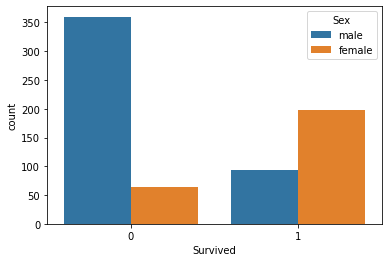

In [132]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x="Survived", hue="Sex", data=df3)
df3.groupby('Survived')['Sex'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

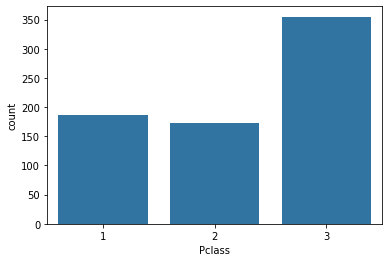

In [133]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(x="Pclass", data=df3)
df3['Pclass'].value_counts()

Pclass  Sex   
1       male      101
        female     85
2       male       99
        female     74
3       male      253
        female    102
Name: Sex, dtype: int64

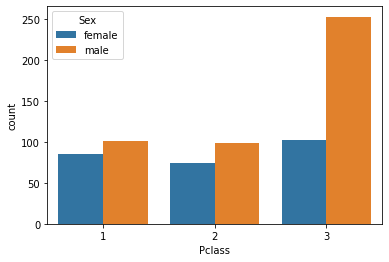

In [134]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x="Pclass", hue="Sex", data=df3)
df3.groupby('Pclass')['Sex'].value_counts()

#### Transformar variables categóricas texto a clases numeradas

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df3.copy()

In [137]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()
label_encoding = le.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoding
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [138]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
print(le.classes_)

['female' 'male']


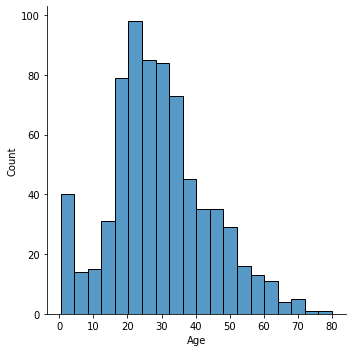

In [139]:
# Alumno: Analizar la distribución de la edad
sns.displot(data=df_cod, x="Age")
plt.show()

In [140]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_norm = df_cod.copy()

In [141]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm['Age'] = scaler.fit_transform(df_norm[['Age']])
#df_norm.loc[:, 'Age'] = scaler.fit_transform(df_norm[['Age']])
df_norm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [142]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_norm.drop('Survived', axis=1).values
y = df_norm['Survived'].values

In [143]:
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [144]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1]
in_shape

5

In [145]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1
out_shape

1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [146]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
from keras.layers import InputLayer, Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
model = Sequential()
model.add(InputLayer(input_shape=(in_shape,)))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=out_shape, activation='sigmoid'))

In [148]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [149]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=80)

Epoch 1/80
15/15 [==============================] - 1s 16ms/step - loss: 0.6620 - accuracy: 0.5965 - val_loss: 0.6715 - val_accuracy: 0.5652
Epoch 2/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6241 - accuracy: 0.6162 - val_loss: 0.6385 - val_accuracy: 0.6087
Epoch 3/80
15/15 [==============================] - 0s 6ms/step - loss: 0.5918 - accuracy: 0.7039 - val_loss: 0.6166 - val_accuracy: 0.6522
Epoch 4/80
15/15 [==============================] - 0s 6ms/step - loss: 0.5664 - accuracy: 0.7018 - val_loss: 0.5971 - val_accuracy: 0.6957
Epoch 5/80
15/15 [==============================] - 0s 6ms/step - loss: 0.5423 - accuracy: 0.7610 - val_loss: 0.5768 - val_accuracy: 0.7304
Epoch 6/80
15/15 [==============================] - 0s 5ms/step - loss: 0.5209 - accuracy: 0.7829 - val_loss: 0.5551 - val_accuracy: 0.7478
Epoch 7/80
15/15 [==============================] - 0s 5ms/step - loss: 0.5024 - accuracy: 0.8004 - val_loss: 0.5347 - val_accuracy: 0.7391
Epoch 8/80
15/15 [=

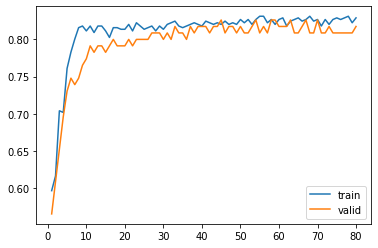

In [150]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
epocas_conteo = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epocas_conteo, y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo, y=history.history['val_accuracy'], label='valid')
plt.show()

In [151]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)
y_hat_prob

5/5 [==============================] - 0s 2ms/step


array([[0.09137763],
       [0.5597419 ],
       [0.7936531 ],
       [0.98204017],
       [0.03530285],
       [0.4542273 ],
       [0.29954082],
       [0.5557448 ],
       [0.5011803 ],
       [0.59381944],
       [0.98550797],
       [0.79800296],
       [0.38640577],
       [0.04625911],
       [0.969497  ],
       [0.14149606],
       [0.11994149],
       [0.98736256],
       [0.20912643],
       [0.9461552 ],
       [0.33342114],
       [0.63037264],
       [0.7329867 ],
       [0.3800449 ],
       [0.13339765],
       [0.18966545],
       [0.20319127],
       [0.08222417],
       [0.6253766 ],
       [0.04625911],
       [0.5098106 ],
       [0.60788715],
       [0.36684346],
       [0.05534071],
       [0.02977494],
       [0.30064073],
       [0.10626157],
       [0.22141598],
       [0.21281962],
       [0.02484825],
       [0.42083764],
       [0.15370636],
       [0.9586002 ],
       [0.05903715],
       [0.26086333],
       [0.8300687 ],
       [0.7436236 ],
       [0.405

In [152]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]
y_hat

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [153]:
# Alumno, calcular la exactitud (accuracy) de su modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.7762237762237763

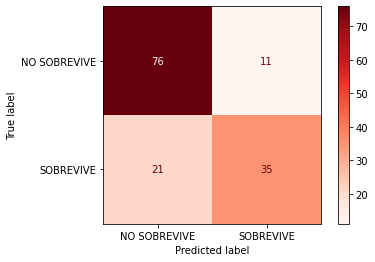

In [154]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['NO SOBREVIVE', 'SOBREVIVE'])
cmd.plot(cmap=plt.cm.Reds)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [172]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo
X_prueba = pd.DataFrame({'Pclass':[1],'Sex':['male'],'Age':[35], 'SibSp':[1], 'Parch':[0]})

In [173]:
X_prueba['Sex'] = le.transform(X_prueba['Sex'])

X_prueba['Age'] = scaler.transform(X_prueba[['Age']])

X_prueba = X_prueba.values

X_prueba

array([[1.        , 1.        , 0.36516706, 1.        , 0.        ]])

In [174]:
prediccion = model.predict(X_prueba)
resultado = ['PROBABLEMENTE SOBREVIVIÓ' if x >= 0.5 else 'PROBABLEMENTE NO SOBREVIVIÓ' for x in prediccion]
resultado

1/1 [==============================] - 0s 116ms/step


['PROBABLEMENTE NO SOBREVIVIÓ']